In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import math
import string

import numpy as np
np.random.seed(1337)
import json, re, nltk, string
from nltk.corpus import wordnet
from gensim.models import Word2Vec

import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline


C:\Users\nsamant\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:

df=pd.read_csv('classifier_data_10.csv')

In [3]:
df.shape

(114749, 3)

In [4]:
df.head()

,owner,issue_title,description
0,amit@chromium.org,"Scrolling with some scroll mice (touchpad, etc...",Product Version : <see about:version>URLs...
1,jon@chromium.org,Proxy causes some or all network requests to fail,Product Version : 0.2.149.27 (1583)URLs (...
2,pfeldman@chromium.org,"Web inspector button ""dock to main window"" doe...",Product Version : chrome beta 1URLs (if a...
3,jon@chromium.org,Habari admin interface is not rendered correctly,Product Version : 0.2.149.27 (1583)URLs (...
4,pkasting@chromium.org,Maximize on second larger monitor not working,Product Version : 0.2.149.27URLs (if appl...


In [5]:
df.isnull().sum()


owner          0
issue_title    1
description    1
dtype: int64

In [6]:

df.dropna(inplace=True)
df.isnull().sum()

owner          0
issue_title    0
description    0
dtype: int64

In [7]:
# df = df[:50]
df.shape

(114747, 3)

In [8]:
df['description']

0         Product Version      : <see about:version>URLs...
1         Product Version      : 0.2.149.27 (1583)URLs (...
2         Product Version      : chrome beta 1URLs (if a...
3         Product Version      : 0.2.149.27 (1583)URLs (...
4         Product Version      : 0.2.149.27URLs (if appl...
                                ...                        
114744                                  We had git trouble 
114745    r255322 is culprithttp://build.chromium.org/p/...
114746    Recently sites have begun replacing window.con...
114747    All Windows GPU bots are failing a variety of ...
114748    UserAgent: Mozilla/5.0 (X11; Linux x86_64) App...
Name: description, Length: 114747, dtype: object

In [9]:
df.tail()

,owner,issue_title,description
114744,navabi@chromium.org,Launch clank_qa recipes to the waterfall,We had git trouble
114745,bulach@chromium.org,data race in ThreadWatcherListTest,r255322 is culprithttp://build.chromium.org/p/...
114746,pfeldman@chromium.org,window.console object should not be configurable,Recently sites have begun replacing window.con...
114747,ernstm@chromium.org,Windows GPU bots failing on multiple tests,All Windows GPU bots are failing a variety of ...
114748,apavlov@chromium.org,CSS auto-complete suggestion list is incomplet...,UserAgent: Mozilla/5.0 (X11; Linux x86_64) App...


In [11]:
filtered = df.groupby('owner')['owner'].filter(lambda x: len(x) >= 500)
f = df[df['owner'].isin(filtered)]
f.shape

(8862, 3)

In [12]:
df = f

In [13]:
len(f['owner'].unique())

13

In [15]:
import string
# remove URL
df['description']=df['description'].apply(lambda x: re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', x))
df['description']=df['description'].apply(lambda x: re.sub(r'(\w+)0x\w+', '', x))
df['description']=df['description'].apply(lambda x: re.sub('\w*\d\w*','', x))
df['description']=df['description'].apply(lambda x: re.sub('\.',' ', x))
df['description']=df['description'].apply(lambda x: re.sub('\?',' ', x))
# df['description']=df['description'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
df['description']=df['description'].apply(lambda x: re.sub(' +',' ',x))
df['description']=df['description'].apply(lambda x: x.lower())
df['description']=df['description'].apply(lambda x: x.strip(string.punctuation))
df['description']=df['description'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [16]:
df

,owner,issue_title,description
2,pfeldman@chromium.org,"Web inspector button ""dock to main window"" doe...",product version chrome beta if applicable oth...
17,pfeldman@chromium.org,"Web inspector button ""dock to main window"" doe...",product version chrome beta if applicable oth...
30,tkent@chromium.org,Use-after-free by navigating out a document du...,version tot linuxwhat steps will reproduce th...
36,sky@chromium.org,"Cannot add an address properly in the ""AutoFi...",chrome version official build what steps will...
41,estade@chromium.org,Attempting to drag a window by the only tab ca...,chrome version developer build what steps wil...
...,...,...,...
114707,tkent@chromium.org,adding first option element to datalist attach...,useragent mozilla windows nt applewebkit kht...
114721,tkent@chromium.org,ASSERTION FAILED: !object || (object->isListBo...,vulnerability detailsselect elements with a si...
114733,pfeldman@chromium.org,DevTools: [regression r167227] timeline frame ...,record a large switch to frame select range...
114739,a...@chromium.org,Class filter is broken,take a heap in summary view type objectresult...


In [17]:
X = df.description
y = df.owner
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

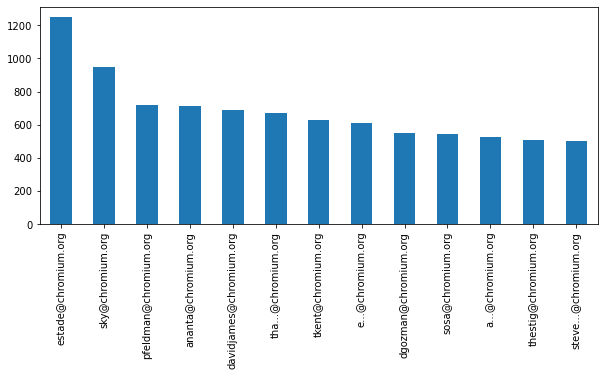

In [18]:
plt.figure(figsize=(10,4))
df.owner.value_counts().plot(kind='bar');

In [19]:
my_tags = y_test.unique()

In [20]:
len(y_test.unique())

13

In [21]:
len(y_train.unique())
y_train.unique() in y_test.unique()

True

## Multinomial Naive Bayes Classifier 

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

# %%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.285821737495299
                         precision    recall  f1-score   support

     tkent@chromium.org       1.00      0.02      0.03       178
   dgozman@chromium.org       0.71      0.13      0.22       222
      e...@chromium.org       0.66      0.54      0.60       226
      sosa@chromium.org       0.87      0.13      0.22       156
      a...@chromium.org       1.00      0.03      0.05       180
  pfeldman@chromium.org       0.19      0.95      0.31       391
    estade@chromium.org       0.48      0.26      0.34       190
davidjames@chromium.org       0.39      0.23      0.29       271
       sky@chromium.org       0.79      0.12      0.20       165
    tha...@chromium.org       1.00      0.08      0.15       151
  steve...@chromium.org       0.74      0.17      0.28       204
    ananta@chromium.org       1.00      0.02      0.04       150
   thestig@chromium.org       0.47      0.17      0.24       175

               accuracy                           0.29      2

## Linear Support Vector Machine

In [47]:

from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

# %%time

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.5385483264385107
                         precision    recall  f1-score   support

     tkent@chromium.org       0.48      0.23      0.31       155
   dgozman@chromium.org       0.61      0.66      0.64       211
      e...@chromium.org       0.63      0.79      0.70       230
      sosa@chromium.org       0.57      0.59      0.58       174
      a...@chromium.org       0.37      0.31      0.34       183
  pfeldman@chromium.org       0.46      0.56      0.51       377
    estade@chromium.org       0.58      0.49      0.53       222
davidjames@chromium.org       0.50      0.59      0.54       263
       sky@chromium.org       0.60      0.38      0.47       159
    tha...@chromium.org       0.68      0.66      0.67       158
  steve...@chromium.org       0.55      0.54      0.54       209
    ananta@chromium.org       0.49      0.42      0.45       159
   thestig@chromium.org       0.50      0.63      0.56       159

               accuracy                           0.54      

## Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

# %%time

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.5238811583301993
                         precision    recall  f1-score   support

     tkent@chromium.org       0.32      0.30      0.31       155
   dgozman@chromium.org       0.63      0.60      0.62       211
      e...@chromium.org       0.60      0.67      0.63       230
      sosa@chromium.org       0.59      0.56      0.58       174
      a...@chromium.org       0.36      0.34      0.35       183
  pfeldman@chromium.org       0.52      0.53      0.52       377
    estade@chromium.org       0.53      0.47      0.50       222
davidjames@chromium.org       0.49      0.51      0.50       263
       sky@chromium.org       0.47      0.58      0.52       159
    tha...@chromium.org       0.73      0.61      0.67       158
  steve...@chromium.org       0.58      0.49      0.53       209
    ananta@chromium.org       0.47      0.48      0.47       159
   thestig@chromium.org       0.52      0.62      0.56       159

               accuracy                           0.52      

C:\Users\nsamant\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Word2vec and Logistic Regression

In [23]:
from gensim.models import Word2Vec
wv = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)
wv.fill_norms(force=False)

In [30]:
model = wv
type(model)

gensim.models.keyedvectors.KeyedVectors

In [35]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.key_to_index:
            mean.append(wv.vectors[wv.key_to_index[word]])
            all_words.add(wv.key_to_index[word])

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [36]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens
    
train, test = train_test_split(df, test_size=0.3, random_state = 42)

test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['description']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['description']), axis=1).values

X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

In [40]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(X_train_word_average, train['owner'])
y_pred = logreg.predict(X_test_word_average)
print('accuracy %s' % accuracy_score(y_pred, test.owner))
print(classification_report(test.owner, y_pred,target_names=my_tags))

accuracy 0.41143286949981195
                         precision    recall  f1-score   support

     tkent@chromium.org       0.25      0.15      0.19       178
   dgozman@chromium.org       0.43      0.44      0.44       222
      e...@chromium.org       0.51      0.55      0.53       226
      sosa@chromium.org       0.43      0.40      0.42       156
      a...@chromium.org       0.29      0.23      0.26       180
  pfeldman@chromium.org       0.38      0.51      0.43       391
    estade@chromium.org       0.43      0.46      0.45       190
davidjames@chromium.org       0.38      0.41      0.40       271
       sky@chromium.org       0.41      0.42      0.42       165
    tha...@chromium.org       0.53      0.48      0.50       151
  steve...@chromium.org       0.45      0.38      0.41       204
    ananta@chromium.org       0.36      0.28      0.31       150
   thestig@chromium.org       0.44      0.46      0.45       175

               accuracy                           0.41     

C:\Users\nsamant\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
